In [ ]:
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install numpy

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/Customer Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


replacing blanks with 0 and no total charges are recorded

In [4]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.isnull().sum().sum()

np.int64(0)

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [8]:
df["customerID"].duplicated().sum()

np.int64(0)

In [9]:
def cov(value):
  if value == 1:
    return "Yes"
  else:
    return "No"

df["SeniorCitizen"] = df["SeniorCitizen"].apply(cov)

Converted 0 and 1 values of SeniorCitizen to yes/no to make is easier to understand

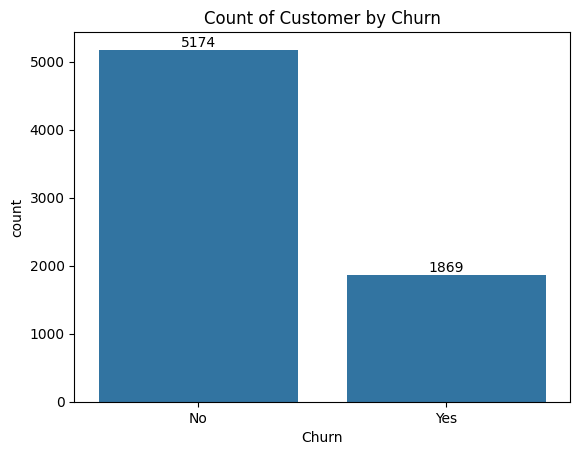

In [10]:
ax = sns.countplot(x = "Churn", data = df)

ax.bar_label(ax.containers[0])
plt.title("Count of Customer by Churn")
plt.show()

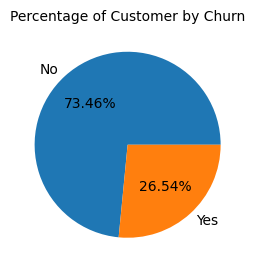

In [11]:
plt.figure(figsize = (3,4))
gb = df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage of Customer by Churn", fontsize = 10)
plt.show()

from the given pie chart we can conclude that 26.54% have customers have churned out. not let's explore reason behind it

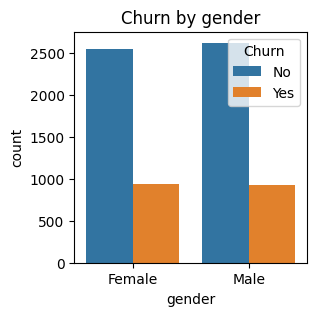

In [12]:
plt.figure(figsize = (3,3))
sns.countplot(x = "gender", data = df, hue = "Churn")
plt.title("Churn by gender")
plt.show()

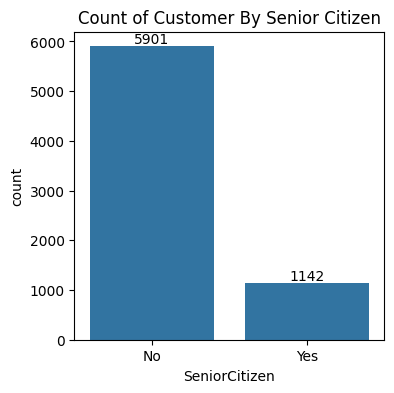

In [13]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "SeniorCitizen", data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customer By Senior Citizen")
plt.show()

comparative a greater percentage of people in senior citizen category have churned

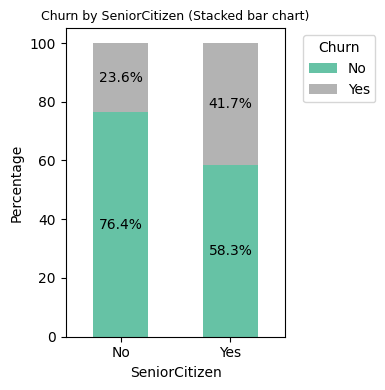

In [14]:
counts = df.groupby(['SeniorCitizen', 'Churn']).size().reset_index(name='count')

total_counts = counts.groupby('SeniorCitizen')['count'].transform('sum')
counts['percentage'] = counts['count'] / total_counts * 100

pivot_df = counts.pivot(index='SeniorCitizen', columns='Churn', values='percentage').fillna(0)

ax = pivot_df.plot(kind='bar', stacked=True, figsize=(4,4), colormap='Set2')

for i, row in enumerate(pivot_df.iterrows()):
    cumulative = 0
    for j, col in enumerate(pivot_df.columns):
        value = row[1][col]
        if value > 0:
            ax.text(i, cumulative + value/2, f'{value:.1f}%', ha='center', va='center', fontsize=10)
        cumulative += value

plt.title('Churn by SeniorCitizen (Stacked bar chart)',fontsize = 9)
plt.ylabel('Percentage')
plt.xlabel('SeniorCitizen')
plt.xticks(rotation=0)
plt.legend(title='Churn', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

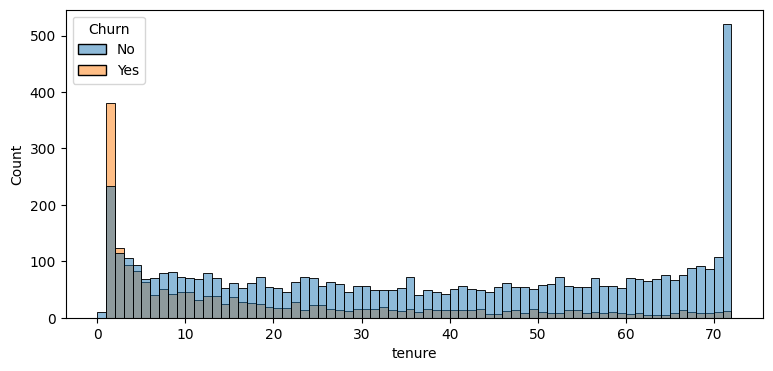

In [15]:
plt.figure(figsize = (9,4))
sns.histplot(x = "tenure", data = df, bins = 72, hue = "Churn")
plt.show()

People who have used our services for a long time have stayed and people who have used services #1 or 2 month Churned

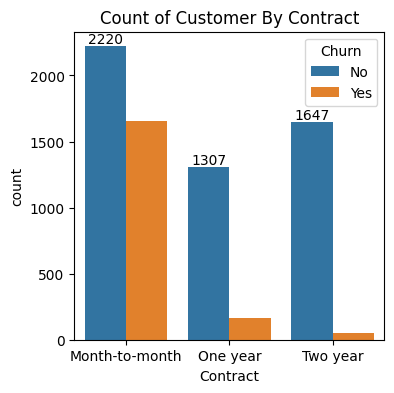

In [16]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "Contract", data =df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customer By Contract")
plt.show()

People who have month to month contract are likely to churn then from those who have 1 or 2 years contract.

In [17]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

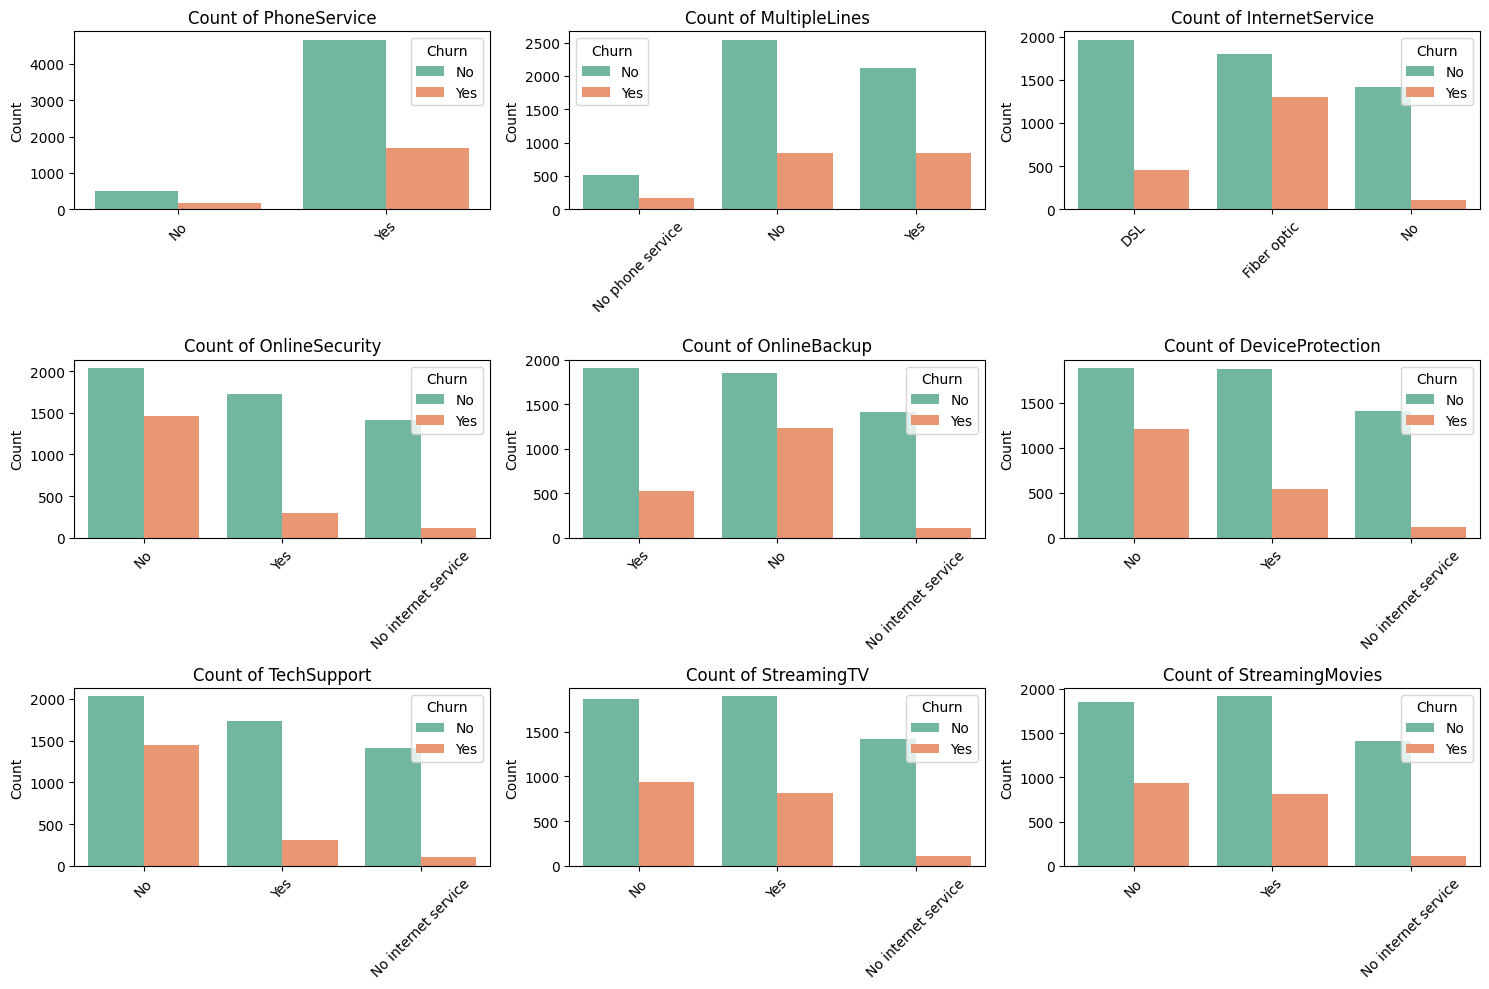

In [20]:
cols = ['PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies']

n_cols = 3
n_rows = -(-len(cols) // n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.countplot(x=col, data=df, ax=axes[i], palette="Set2", hue = "Churn")
    axes[i].set_title(f"Count of {col}")
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

The plots show churn distribution across various service categories. Customers without certain services like OnlineSecurity, TechSupport, and DeviceProtection tend to have higher churn rates. Fiber optic internet users also display relatively higher churn compared to DSL users. Overall, the absence of additional services seems correlated with increased churn.

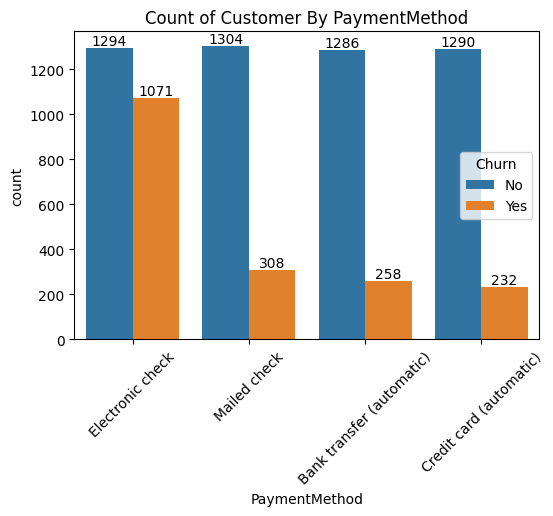

In [23]:
plt.figure(figsize = (6,4))
ax = sns.countplot(x = "PaymentMethod", data =df, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Count of Customer By PaymentMethod")
plt.xticks(rotation=45)
plt.show()

Customer is likely to churn when he is using electronic check as a payment method